In [8]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY
import math
import datetime as dt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

#Get the stock quote
df = web.DataReader('BTC-USD', data_source='yahoo', start = start, end = end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...
2022-02-06,42500.785156,41244.906250,41441.121094,42412.433594,16142097334,42412.433594
2022-02-07,44401.863281,41748.156250,42406.781250,43840.285156,28641855926,43840.285156
2022-02-08,45293.867188,42807.835938,43854.652344,44118.445312,33079398868,44118.445312


In [13]:
# Get the number of rows and columns in the dataset
df.shape

(2704, 6)

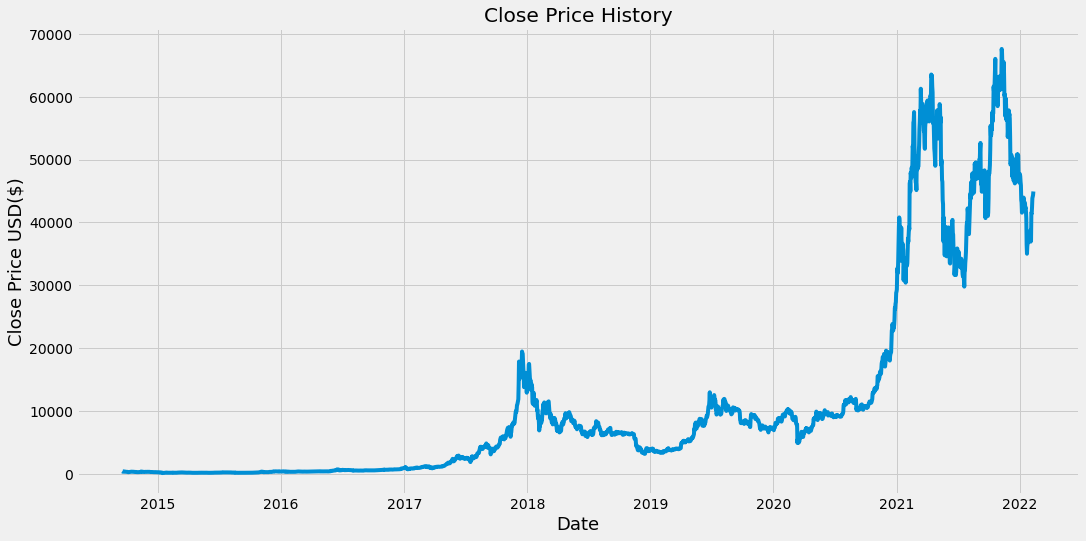

In [15]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [16]:
# Create a new DataFrame with only the close column
data_close = df.filter (['Close'])

#Convert the DataFrame to a numpy array

dataset = data_close.values

#Get number of rows to train the model on

training_data_len = math.ceil( len(dataset) * .8 )
print(training_data_len)

2164


In [18]:
# Scale the data - best practice to preprocess
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.65204294],
       [0.6553128 ],
       [0.66397337]])

In [20]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = [] # Independant variables
y_train = [] #Dependant variables

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #Contain 60 falues from position 0 to 59
    y_train.append(train_data[i, 0]) # contain the 61st value at position 60
    if i<= 60:
        print(x_train)
        print(y_train)
        print()
    

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]



In [21]:
#Convert the X_train and the y_train data sets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#Reshape the x_train data: LSTM expects the inputs to be 3D
x_train.shape

(2104, 60)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
x_train.shape

(2104, 60, 1)

In [25]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-02-10 11:19:28.971608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-10 11:19:28.971633: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-10 11:19:28.971652: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thedossier): /proc/driver/nvidia/version does not exist
2022-02-10 11:19:28.971822: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
